# Kooplearn Datasets Visualization

This notebook visualizes the various datasets available in the `kooplearn` library.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from kooplearn.datasets import (
    fetch_ordered_mnist,
    make_duffing,
    make_linear_system,
    make_logistic_map,
    make_lorenz63,
    make_prinz_potential,
    make_regime_switching_var,
)

# Set professional style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = '#f8f9fa'
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

kl_color = '#2A7E69'

## Lorenz-63 System

The Lorenz-63 system is a simplified mathematical model of atmospheric convection that exhibits chaotic behavior. It is one of the most famous examples of deterministic chaos. The system is governed by:

$$
\begin{cases}
\frac{dx}{dt} = \sigma (y - x) \\
\frac{dy}{dt} = x(\mu - z) - y \\
\frac{dz}{dt} = xy - \beta z.
\end{cases}
$$

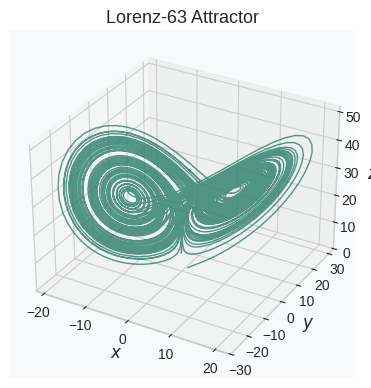

In [3]:
data = make_lorenz63(X0=[1, 1, 1], n_steps=1e4)
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='3d')

ax.plot(data["x"], data["y"], data["z"], color=kl_color, lw=1, alpha=0.8)

ax.set_title("Lorenz-63 Attractor")
ax.set_xlabel("$x$", labelpad=-5)
ax.set_ylabel("$y$", labelpad=-5)
ax.set_zlabel("$z$", labelpad=-5)
ax.tick_params(axis='both', which='major', pad=-2)
ax.grid(True)

plt.tight_layout()
plt.show()

fig.savefig("lorenz63_attractor.svg", format='svg', dpi=300)  # Save as SVG file

## Duffing Oscillator

The Duffing oscillator is a damped driven nonlinear harmonic oscillator commonly used to study chaotic dynamics in physics and engineering. The system is governed by the differential equation:

$$x'' + \delta x' + \alpha x + \beta x^3 = \gamma \text{cos}(\omega t).$$

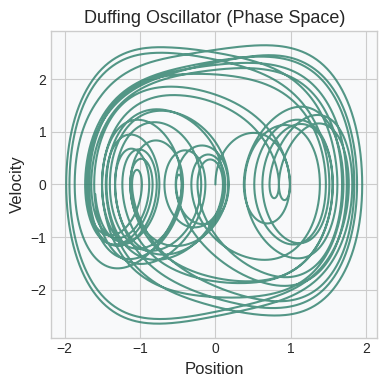

In [4]:
data = make_duffing(X0=[0, 0], n_steps=1e4, dt=0.01, alpha=-1.0, beta=1.0, delta=0.3, gamma=2)
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

# Phase space plot
ax.plot(data["position"], data["velocity"], c=kl_color, alpha=0.8)

ax.set_title("Duffing Oscillator (Phase Space)")
ax.set_xlabel("Position")
ax.set_ylabel("Velocity")
ax.grid(True)

plt.tight_layout()
plt.show()

fig.savefig("duffing_phase_space.svg", format='svg', dpi=300)  # Save as SVG file

## Linear System

The linear dynamical system is governed by:
$$x_{t+1} = A x_t + \xi_t$$

where $\xi_t \sim \mathcal{N}(0, \sigma^2 I)$ is zero-mean Gaussian noise with standard deviation $\sigma$. For this linear system, the Koopman operator is simply the transpose $A$.

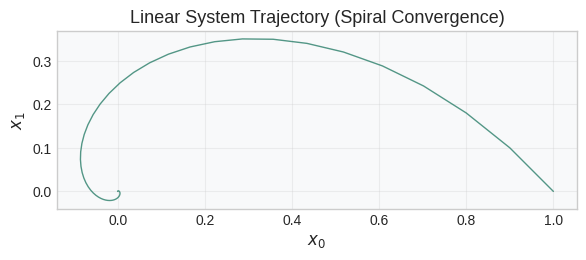

In [5]:
# Linear system with spiral convergence
A = np.array([[0.9, -0.1], [0.1, 0.9]])
X0 = np.array([1, 0.0])
data = make_linear_system(X0, A, n_steps=int(1e2), noise=0.0)

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(data["x0"], data["x1"], color=kl_color, lw=1, alpha=0.8)

ax.set_title("Linear System Trajectory (Spiral Convergence)")
ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$")
ax.grid(True, linestyle='-', alpha=0.3)
ax.set_aspect('equal')
plt.tight_layout()
plt.show()

fig.savefig("linear_system_spiral.svg", format='svg', dpi=300)  # Save as SVG file

## Logistic Map

The logistic map is a discrete-time dynamical system defined by:
$$x_{t+1} = r x_t (1 - x_t) + \xi_t$$
where $\xi_t$ is drawn from a trigonometric noise distribution. The classic chaotic logistic map uses $r = 4$. For this system with trigonometric noise, the eigenfunctions of the Koopman operator can be computed analytically using the basis:
$$\phi_i(x) = c_i \sin^{2M-i}(\pi x) \cos^i(\pi x)$$
for $i = 0, 1, \ldots, 2M$.

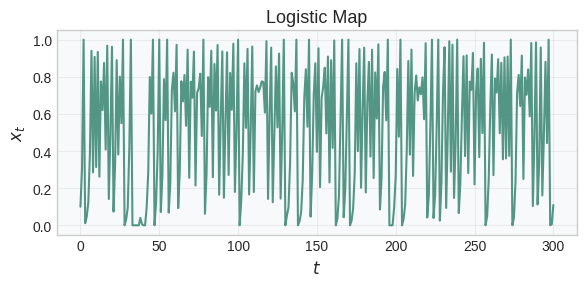

In [6]:
data = make_logistic_map(X0=0.1, n_steps=300)

fig, ax = plt.subplots(1, 1, figsize=(6, 3))

# Time series
ax.plot(np.arange(len(data)), data["x"], color=kl_color, lw=1.5, alpha=0.8)

ax.set_title("Logistic Map")
ax.set_xlabel("$t$")
ax.set_ylabel("$x_t$")
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

fig.savefig("logistic_map.svg", format='svg', dpi=300)  # Save as SVG file

## Regime Switching VAR

This model alternates between two linear dynamical regimes according to a Markov transition matrix. At each step, the system evolves according to one of two dynamics matrices ``phi1`` or ``phi2``, with optional Gaussian noise. 
Mathematically, the system evolves as:
$$x_{t+1} = \Phi_{s_t} x_t + \epsilon_t, \quad \epsilon_t \sim \mathcal{N}(0, \sigma^2 I)$$
where $s_t$ is the active regime (0 or 1), evolving according to a 2x2 Markov transition matrix $P$ such that
$$P_{ij} = \mathbb{P}(s_{t+1} = j \mid s_t = i).$$

In [7]:
import scipy


def make_oscillatory_matrix(frequencies, dt=1.0):
    blocks = []
    for f in frequencies:
        if f < 0:
            raise ValueError("Frequencies must be non-negative.")
        omega = 2 * np.pi * f
        theta = omega * dt
        rotation_matrix = np.array(
            [[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]
        )
        blocks.append(rotation_matrix)

    return scipy.linalg.block_diag(*blocks)

/tmp/ipykernel_41876/1859277158.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, ncols=2)


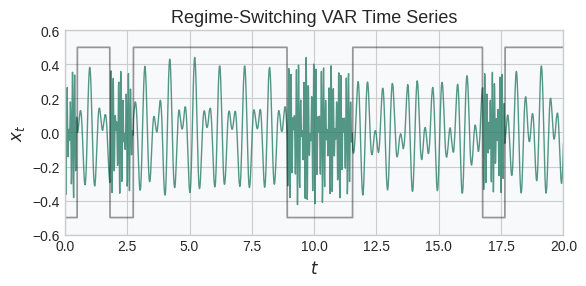

In [8]:
dt = 0.01
n_steps = 2000
noise = 0.001
fast_frequencies = [10, 13]
fast_phi = make_oscillatory_matrix(fast_frequencies, dt=dt)
slow_frequencies = [2, 3]
slow_phi = make_oscillatory_matrix(slow_frequencies, dt=dt)
regime_transition_matrix = np.array([[0.99, 0.01], [0.005, 0.995]])

# Initial state
X0 = 0.1 * np.ones(slow_phi.shape[0])
X = make_regime_switching_var(
    X0,
    fast_phi,
    slow_phi,
    regime_transition_matrix,
    n_steps=n_steps,
    noise=noise,
    dt=dt,
    random_state=0
)
y = X.values.sum(axis=1) # Sum the states into a single signal
times = X.index.get_level_values("time")
regimes = X.attrs['regimes']

fig, ax = plt.subplots(1, 1, figsize=(6, 3))

ax.plot(times, y, color=kl_color, lw=1, alpha=0.8)
ax.plot(times, regimes - 0.5, color='k', lw=1.25, alpha=0.4)

ax.legend(frameon=False, ncols=2)
ax.set_title("Regime-Switching VAR Time Series")
ax.set_ylabel("$x_t$")
ax.set_xlabel("$t$")
ax.set_ylim(-0.6, 0.6)
ax.margins(0)

plt.tight_layout()
plt.show()

fig.savefig("regime_switching_var.svg", format='svg', dpi=300)  # Save as SVG file

## Prinz Potential

This quadruple-well potential exhibits three metastable states separated by energy barriers. The dynamics follow the (discretized) overdamped Langevin equation:
$$X_{t + 1} = X_t -\frac{1}{\gamma}\nabla V{X_t}\Delta t + \frac{\sigma}{\gamma}\sqrt{\Delta t}\xi_t,$$
where $\xi_t$ is a Gaussian white noise process with zero mean and unit variance, $\gamma$ is the friction coefficient, and $k_B T = \frac{\sigma^2}{2\gamma}$ determines the thermal energy scale.

The potential is defined as:
$$V(x) = 32 x^8 - 256 e^{-80 x^2} - 80 e^{-40 (x + 0.5)^2}
        - 128 e^{-80 (x - 0.5)^2}.$$

Plotting Prinz Potential...


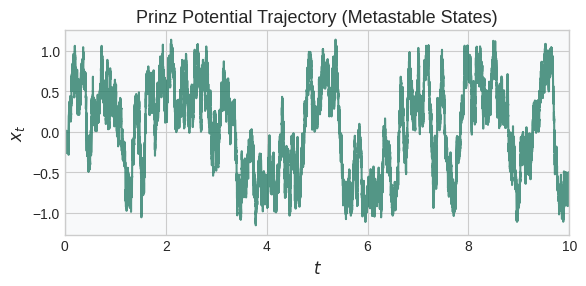

In [ ]:
data = make_prinz_potential(X0=0.0, n_steps=100000, gamma=1, sigma=2)

fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(data.index.get_level_values('time'), data["x"], color=kl_color, alpha=0.8)
ax.set_title("Prinz Potential Trajectory (Metastable States)")
ax.set_xlabel("$t$")
ax.set_ylabel("$x_t$")
ax.set_xlim(0, 10)

plt.tight_layout()
plt.show()

fig.savefig("prinz_potential.svg", format='svg', dpi=300)  # Save as SVG file

## Ordered MNIST

This function wraps [```sklearn.datasets.fetch_openml```](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html) for the MNIST dataset (OpenML ID 554) and reorders the samples so that digits ``0`` through ``num_digits - 1`` are **interleaved** in the output. This is useful for
generating class-balanced or periodic sequences for Koopman operator regression experiments.

The MNIST dataset contains 70,000 grayscale handwritten digits (60,000 for training and 10,000 for testing) of size 28×28.


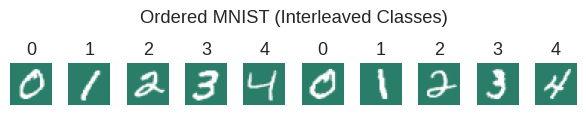

In [ ]:
import matplotlib.colors as mcolors

# 1. Define the colors
hex_color = "#2A7E69"
white = "#FFFFFF"

# 2. Create the colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("teal_to_white", [hex_color, white])

images, targets = fetch_ordered_mnist(num_digits=5)

n_img = 10
fig, axes = plt.subplots(1, 10, figsize=(6, 1.2))
for i, ax in enumerate(axes.flat):
    if i < n_img:
        ax.imshow(images[i], cmap=custom_cmap)
        ax.set_title(f"{targets[i]}")
    ax.axis('off')

plt.suptitle("Ordered MNIST (Interleaved Classes)")

plt.tight_layout()
plt.show()

fig.savefig("ordered_mnist_interleaved.svg", format='svg', dpi=300)  # Save as SVG file